# A4: modules, functions and imports
### Functions: load_tif_as_tensor ; create_satellite_normalization_params ; run_dofa_inference

These functions are a continuation of my previous A3 assignment, with improvements made especially to the `run_dofa_inference` function for better flexibility and visualization support.

---

## Summary
- **`load_tif_as_tensor`**  
  Loads a `.tif` image, processes and normalizes it, and returns a PyTorch tensor ready for model inference. 

- **`create_satellite_normalization_params`**  
  Returns mean and standard deviation values for normalizing satellite imagery, based on different satellite types (e.g., Sentinel-2, Landsat, or ImageNet defaults).

- **`run_dofa_inference`**  
  Loads the DOFA (Dynamic One-For-All) model, performs inference on a preprocessed image tensor, and optionally visualizes the resulting 45-dimensional feature vector. The output graph shows how strongly the image activates each semantic feature learned by the model and it can be useful for interpreting spatial/spectral patterns. It also prints inference time and output shape for performance benchmarking.

In [17]:
# Load Functions
from geo_utils import load_tif_as_tensor, create_satellite_normalization_params, run_dofa_inference

Original dtype: uint8, Shape: (3, 1768, 1636), Range: 0.0 to 255.0
Scaled 8-bit data
Clipped to (2, 98) percentiles
Normalization: mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
Final tensor shape: torch.Size([1, 3, 224, 224])
Running inference on device: cuda
Inference complete. Output shape: torch.Size([1, 45])


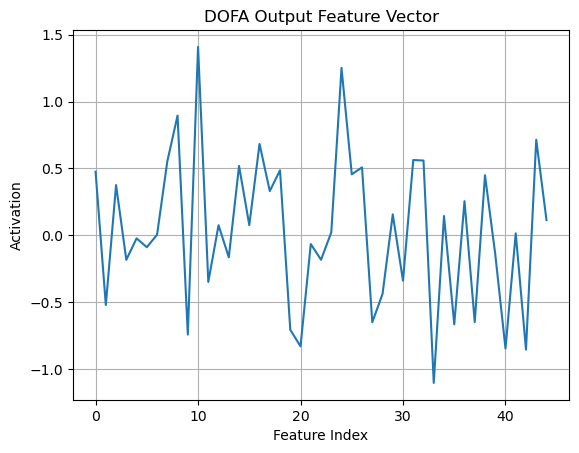

Feature vector shape: torch.Size([1, 45])


In [18]:
# Step 1: Config 
image_path = "sentinel2.tif"  # Path to your GeoTIFF
imagery_type = "sentinel2"
bands = [1, 2, 3]  # R, G, B

# Step 2: Load and preprocess
norm_params = create_satellite_normalization_params(imagery_type)

image_tensor = load_tif_as_tensor(
    path=image_path,
    size=(224, 224),
    bands=bands,
    band_order='RGB',
    normalization_params=norm_params,
    handle_nodata=True,
    clip_percentiles=(2, 98)
)

# Step 3: Inference 
features = run_dofa_inference(
    image_tensor=image_tensor,
    wavelengths=[0.64, 0.56, 0.48],  # RGB wavelengths in micrometers
    visualize=True
)

print("Feature vector shape:", features.shape)

### AI Disclaimer  
Parts of this code, including debugging, error handling, and text refinement, were developed with the assistance of AI tools. AI was used to help correct code logic, fix grammar, and improve clarity in documentation.